In [206]:
import math
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = False

In [207]:
alfatotwo = 2.547
u0 = 1.1546
'''
  Funcio potencial original  (\Psi(u)) en funcio del u0 que volem
  l'expresio de Psi que donem es correcta
  només si u0 s'ha calculat com  u0 = (k/(m l^2))^(1/alpha^2)
  i per tant es cumpleix que Psi(u0) = u0

  1/l^2 = u0^alphatotwo
'''
def Psi(u,u0,alphatotwo):
  psival = math.pow(u0,alphatotwo)*math.pow(u,1.0-alphatotwo)
  return psival

'''
  Primera derivada de \Psi(u)
  cumpleix que:  1-PsiD1(u0) = alpha^2
'''

def PsiD1(u,u0,alphatotwo):
  psid1val = math.pow(u0,alphatotwo)*(1.0-alphatotwo)*math.pow(u,-alphatotwo)
  return psid1val

'''
  Segona derivada de \Psi(u)
'''
def PsiD2(u,u0,alphatotwo):
  psid2val =  math.pow(u0,alphatotwo)*(1.0-alphatotwo)*(-alphatotwo)*math.pow(u,-alphatotwo-1.0)
  return psid2val

'''
  Tercera derivada de \Psi(u)
'''
def PsiD3(u,u0,alphatotwo):
  psid3val = math.pow(u0,alphatotwo)*(1.0-alphatotwo)*(-alphatotwo)*(-alphatotwo-1.0)*math.pow(u,-alphatotwo-2.0)
  return psid3val



'''
Primer terme en la aproximació (\lambda^0):

   vo'' + v0 = 0

   Solució:
'''
def termv0( A, beta, theta ):
   v0 = A*math.cos( beta * theta )
   return v0

'''
Segon terme en la aproximació (\lambda^1):

  v1'' + v1 = funciode(v0'',v0)

  la solució depen de alpha^2 i de psid2
'''
def termv1( A, alphatotwo, beta, theta, psid2 ):
   phi = beta * theta
   v1 = (psid2/(12.0*alphatotwo))*A*A*(3.0-math.cos(2.0*phi)-2.0*math.cos(phi))
   return v1

'''
Tercer terme en la aproximació (lambda^2):

  v2'' + v2 = funciode(v0'',v0,v1'',v1)

  la solució depen de alpha^2, beta, A, psid2, psid3
'''
def termv2( A, alphatotwo, beta, theta, psid2, psid3 ):
   phi = beta * theta
   v2 = (29.0*((psid2/alphatotwo)**2.0)+3.0*(psid3/(alphatotwo)))*(A**3)*math.cos(phi)/576.0
   v2 = v2 -((A**3)*((psid2/alphatotwo)**2.0)/12.0)
   v2 = v2 + ((A**3)*((psid2/alphatotwo)**2.0)*math.cos(2.0*phi)/36.0)
   v2 = v2 + ((1.0*((psid2/alphatotwo)**2.0)-1.0*(psid3/alphatotwo))*(A**3)*math.cos(3.0*phi)/192.0)
   return v2



In [208]:
'''
  PoincareLindsted ordre 2 (termes v0, v1 i v2)
  per ecuació de trajectoria u=u0+h (u=1/r):
  u'' + u = Psi(u)

  u0 ha de ser el valor que cumpleix:
  u0 = Psi(u0)
'''
def PoincareLindsted( numiter, thetastep, u0, A, Psifn1D, Psifn2D, Psifn3D, alphatotwo):
   r0 = 1.0/u0

   print(" rmin: ", 1.0/(u0+A))
   print("alpha^2 =",alphatotwo)

   # Segona i tercera derivades a u0
   psi2du0 = Psifn2D(u0,u0=u0, alphatotwo=alphatotwo)
   psi3du0 = Psifn3D(u0,u0=u0, alphatotwo=alphatotwo)
   # beta per ordre 2 (beta1_2 = 0):
   beta1_1 = 0.0
   beta2_2 = -(5.0*(psi2du0**2.0)+3.0*alphatotwo*psi3du0)*(A*A)/(24.0*alphatotwo)
   print( " beta2_2: ",beta2_2)
   # lambda = 1, per tant:
   beta = math.sqrt(alphatotwo + beta1_1 + beta2_2)
   print( "Beta: ",beta)

   thetarange = [ thetastep*i for i in range(numiter) ]
   radious = [0.0 for i in range(numiter)]
   # x , y millor com numpy arrays per despres
   # poder escalar facilment els valors
   xpos = np.array([0.0 for i in range(numiter)])
   ypos = np.array([0.0 for i in range(numiter)])

   i = 0
   for theta in thetarange:
     v0 = termv0( A, beta, theta )
     v1 = termv1( A, alphatotwo, beta, theta, psi2du0 )
     v2 = termv2( A, alphatotwo, beta, theta, psi2du0, psi3du0 )
     # lambda = 1, per tant:
     vfinal = v0+v1+v2
     # radi para el theta  actual = 1/u = 1/(u0+v)
     radious[i] = 1.0/(u0+vfinal)
     # transformar a coordenades cartesianes
     xpos[i] = (radious[i] * math.cos(theta))
     ypos[i] = (radious[i] * math.sin(theta))
     if (i % 50 == 0):
       print( v0,v1,v2," (theta,r): ", theta, radious[i], " (x,y):", xpos[i], ypos[i])
       print( "DIFF: ", xpos[i] -(r0 * math.cos(theta)), ypos[i] -(r0 * math.sin(theta)) )
     i = i+1
   return(xpos, ypos)

u0 = 1.1546
 rmin:  0.7789982083041208
alpha^2 = 2.547
 beta2_2:  0.005964760428174624
Beta:  1.5977999750995664
0.1291 0.0 1.3552527156068805e-20  (theta,r):  0.0 0.7789982083041208  (x,y): 0.7789982083041208 0.0
DIFF:  -0.08710260583064444 0.0
-0.05340152688189601 0.008346429451890658 -0.00039038734886782283  (theta,r):  1.25 0.9015876384009803  (x,y): 0.28429074404696836 0.8555928018436562
DIFF:  0.011189789261528693 0.03367645041841261
-0.08492148608337935 0.008281511325669136 -0.00037861484283369215  (theta,r):  2.5 0.9280041306849411  (x,y): -0.7434645844994229 0.555384621828345
DIFF:  -0.04959344683535427 0.03704741058292971
0.1236561670357634 0.0004642074543096712 -4.771954530238205e-05  (theta,r):  3.75 0.7820609881136409  (x,y): -0.641727461806871 -0.446995809703173
DIFF:  0.06895966563082234 0.048033913787510985
-0.017377942701632926 0.007877274941154314 -0.00041916919668394105  (theta,r):  5.0 0.8736064730446254  (x,y): 0.24780912137865949 -0.83772245350534
DIFF:  0.0021290

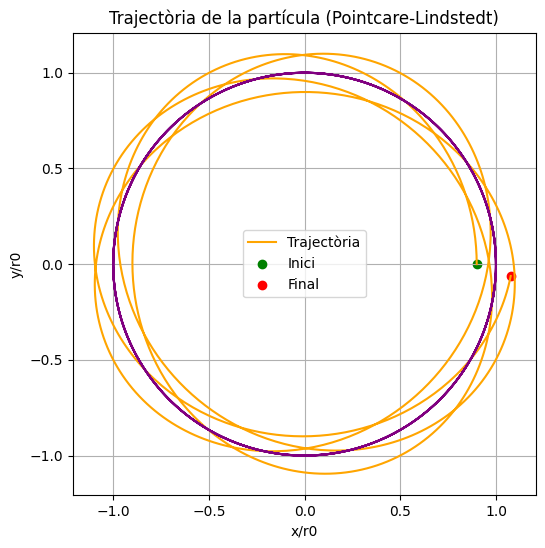

In [209]:
'''
Determinar les constants necesaries segons condicions inicials:
 u0 queda determinada per la condicio:
  u0 = Psi(u0)
 Si per theta=0 asumim conveni posicio inicial igual a
   (r,theta) = (rmin,0):
     h(0) = v(0) = A (A constant arbitraria)
'''
A = 0.1291
thetastep = 0.025
numiter = 4*int((2*math.pi)/thetastep)
u0 = 1.1546
alphatotwo = 2.547
r0=1.0/u0
print("u0 =",u0)

# cercle radi 1 per comparar
xcpos = np.array([(1 * math.cos(thetastep*i)) for i in range(numiter)])
ycpos = np.array([(1 * math.sin(thetastep*i)) for i in range(numiter)])

xpos, ypos = PoincareLindsted( numiter, thetastep, u0, A, PsiD1, PsiD2, PsiD3, alphatotwo)



fig,ax = plt.subplots(figsize=(12, 6))
#ax.scatter( xpos, ypos )
ax.plot(xpos/r0,ypos/r0, color="orange", label="Trajectòria")
ax.plot(xcpos,ycpos, color="purple")
plt.scatter(xpos[0]/r0, ypos[0]/r0, color="green", label="Inici")
plt.scatter(xpos[-1]/r0, ypos[-1]/r0, color="red", label="Final")
ax.set_xlabel("x/r0")
ax.set_ylabel("y/r0")
plt.title("Trajectòria de la partícula (Pointcare-Lindstedt)")
plt.gca().set_aspect("equal")
plt.legend()
plt.grid()
plt.show()

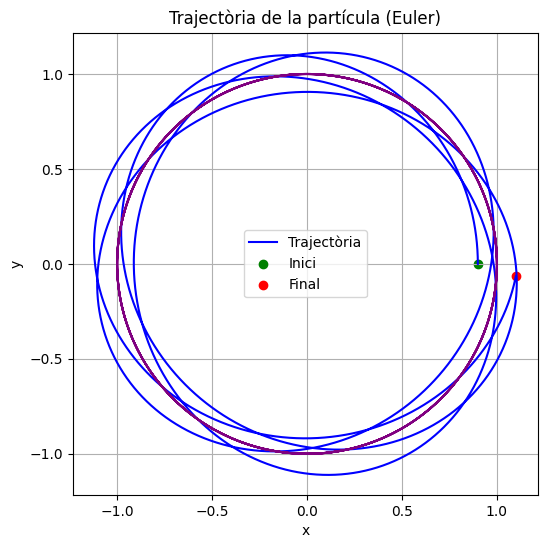

In [210]:
def fx(x, y):
    r = np.sqrt(x**2 + y**2)
    return -x * r**-1.453

def fy(x, y):
    r = np.sqrt(x**2 + y**2)
    return -y * r**-1.453

x0, y0 = 0.779, 0.0
vx0, vy0 = 0.0, 1.069
n = 22870
h = 0.001

def euler_particula_passos(fx, fy, x0, y0, vx0, vy0, n, h):
    x_vals = np.zeros(n)
    y_vals = np.zeros(n)
    vx_vals = np.zeros(n)
    vy_vals = np.zeros(n)

    x_vals[0] = x0
    y_vals[0] = y0
    vx_vals[0] = vx0
    vy_vals[0] = vy0

    for i in range(1, n):
        x = x_vals[i-1]
        y = y_vals[i-1]
        vx = vx_vals[i-1]
        vy = vy_vals[i-1]

        ax = fx(x, y)
        ay = fy(x, y)

        vx_vals[i] = vx + h * ax
        vy_vals[i] = vy + h * ay

        x_vals[i] = x + h * vx
        y_vals[i] = y + h * vy

    return x_vals, y_vals, vx_vals, vy_vals

x_vals, y_vals, vx_vals, vy_vals = euler_particula_passos(fx, fy, x0, y0, vx0, vy0, n, h)

plt.figure(figsize=(6, 6))
plt.plot(x_vals/r0, y_vals/r0, label="Trajectòria", color="blue")
plt.plot(xcpos,ycpos, color="purple")
plt.scatter(x_vals[0]/r0, y_vals[0]/r0, color="green", label="Inici")
plt.scatter(x_vals[-1]/r0, y_vals[-1]/r0, color="red", label="Final")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajectòria de la partícula (Euler)")
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

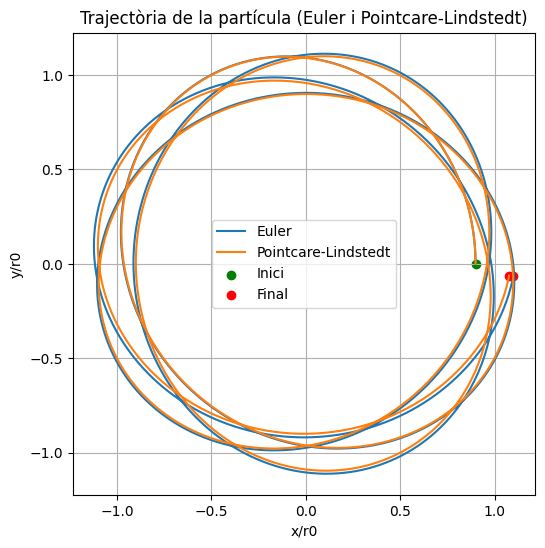

In [211]:
fig,ax = plt.subplots(figsize=(12, 6))
plt.plot(x_vals/r0, y_vals/r0, label="Euler")
ax.plot(xpos/r0,ypos/r0, label="Pointcare-Lindstedt")
plt.scatter(x_vals[0]/r0, y_vals[0]/r0, color="green", label="Inici")
plt.scatter(x_vals[-1]/r0, y_vals[-1]/r0, color="red", label="Final")
plt.scatter(xpos[-1]/r0, ypos[-1]/r0, color="red")
ax.set_xlabel("x/r0")
ax.set_ylabel("y/r0")
plt.title("Trajectòria de la partícula (Euler i Pointcare-Lindstedt)")
plt.gca().set_aspect("equal")
plt.legend()
plt.grid()
plt.show()